#🤖 Chatbot Project

**Here is Langraph's Glossary of terms and functions:**

https://langchain-ai.github.io/langgraph/concepts/low_level/

##🟦Importing

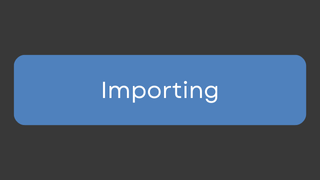

### Imports

Our imports will be simple. the tool we will be using to help us is called **langchain**. It will help us to deploy LLM applications

We will need to `!pip install` some new modules. ***Import these two modules:***

`langchain-core langgraph>0.2.27`

`-U langchain langchain-openai`

`-qU "langchain[groq]"`



In [ ]:
# CODE HERE

In [ ]:
!pip install langchain-core langgraph>0.2.27

In [ ]:
!pip install -U langchain langchain-openai

In [ ]:
!pip install -qU "langchain[groq]"

In [ ]:
# !pip install langchain-core langgraph>0.2.27
# !pip install -U langchain langchain-openai
# !pip install -qU "langchain[groq]"

###⌛API Key

You will need to access an API key in order to use langchain's resources.

In [ ]:
api_key='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'

***We have to add our Langchain API Key to our environmental variables***


> Environmental variables are secure pieces of data that we want to store in the computer memory so we dont have to explicitely have them (API Keys) in the code. It's similar to defining variables.

***Use `os.environ[]` to create data with a name and a value. Set it for our API key and our tracing***


TIP: Some extra imports are useful for us in creating the model:

> `getpass` is used to  prompt the user for sensitive inputs (such as API keys). It will look like: `Enter API key for Groq:`

> `os` is used to work with environmental variables

> `langchain.chat_models` is used for all the chat models from langchain

In [ ]:
# CODE HERE
import getpass
import os

os.environ['LANGSMITH_TRACING'] = 'true'
os.environ['LANGSMITH_API_KEY'] = getpass.getpass("ENTER YOUR API KEY HERE: ")

ENTER YOUR API KEY HERE: ··········


In [ ]:
# CODE HERE
import getpass
import os
from langchain.chat_models import init_chat_model

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your GROQ API key: ")


## 🟩Model Building


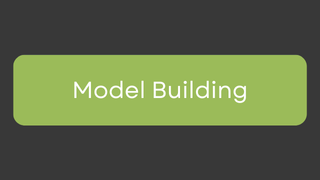

### Building The Chatbot


Now we can initialize our model. ***Call `init_chat_model()` and use `llama3-8b-8192` as the model and `groq` as the model provider***

In [ ]:
model = init_chat_model("llama3-8b-8192", model_provider="groq")

## 🟪Testing

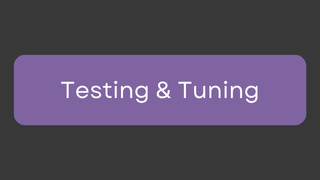

###⌛Model Testing

There's a lot we can do with this model. for example, if we want to give the model a message from a human, we do so with `langchain_core.messages import HumanMessage`

***Import `HumanMessage` from `langchain_core.messages` and use `model.invoke()` to have the model generate a response. Print the `content` of the response***

> TIP: `The HumanMessage()` function takes `content` as a parameter where you should put a string

In [ ]:
# CODE HERE
from langchain_core.messages import HumanMessage

response = model.invoke([HumanMessage(content = "I am awesome!")])
response.content

"That's amazing to hear! It's great to have a positive and confident attitude. Being awesome is all about embracing your unique qualities and rocking them with pride. What makes you feel awesome today?"

If we want to have a premade conversation (and have the chatbot see it as previous context) we can do that too with `AIMessage`. ***Use `model.invoke` and multiple `HumanMessage()` and `AIMessage()` functions to see if the model logically follows prompts.***

In [ ]:
# CODE HERE
from langchain_core.messages import AIMessage

response = model.invoke([HumanMessage(content = "I like cheese, especially Swiss, Cheddar, and Provolone, do you?"), AIMessage(content = "Ew no I hate cheese, it makes me barf and it smells bad!"), HumanMessage(content = "Oh I am sorry to hear that, do you remember what cheeses I like?")])
response.content

"Don't worry about it! As a digital AI assistant, I don't have personal preferences, taste buds, or a stomach, so I don't have the ability to like or dislike cheese (or any food). I'm just here to provide information and answer your questions to the best of my abilities. But I do remember that you mentioned you like Swiss, Cheddar, and Provolone cheese!"

Now, instead of the model losing its memory everytime we re-run a cell, let's keep the memory instead. We will use a `MemorySaver` to keep track of all the changes.

***Import***:

`from langgraph.checkpoint.memory import MemorySaver`

`from langgraph.graph import START, MessagesState, StateGraph`

***Make a graph using the `StateGraph()` function. After define a function to call the model using `model.invoke()`. Then define a `START` node and another node that is `call_model`. Finally, add memory using `MemorySaver()***


In [ ]:
# CODE HERE
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

conversation = StateGraph(state_schema = MessagesState)

def call_model (state):
  response = model.invoke(state["messages"])
  return {"messages":response}

conversation.add_edge(START, "model")
conversation.add_node("model", call_model)

memory = MemorySaver()
app = conversation.compile(checkpointer = memory)

Using the config below, test out different queries to experiment with Llama on.

In [ ]:
config = {"configurable": {"thread_id": "abc123"}}
query = "Hi! I'm Bob."

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()  # output contains all messages in state

================================== Ai Message ==================================

Hello Bob! It's nice to meet you. Is there something I can help you with or would you like to chat?


Let's make our above code easier to manage. ***Transform the above code into a re-usable function and call it `prompt_llm()`. Have another function called `chatbot()` and have it use the `input()` function to ask for your prompt.***

In [ ]:
# CODE HERE
def prompt_llm(prompt):
  input_messages = [HumanMessage(prompt)]
  output = app.invoke({"messages": input_messages}, config)

  return output["messages"][-1].pretty_print()

def chatbot(chat):
  while chat:
    prompt = input("Please type your prompt: ")
    prompt_llm(prompt)

chatbot(True)

Please type your prompt: Today the weather was really sunny, what do you think?
================================== Ai Message ==================================

I'm just an AI, I don't have the ability to perceive the physical world, so I don't have a personal opinion or observation about the weather. But I'm happy to chat with you about it! How did you enjoy the sunny weather? Did you get outside and enjoy it?
Please type your prompt: end the chat
================================== Ai Message ==================================

It was nice chatting with you, Bob! If you want to talk again or need anything in the future, feel free to start a new conversation. Have a great day!


KeyboardInterrupt: Interrupted by user